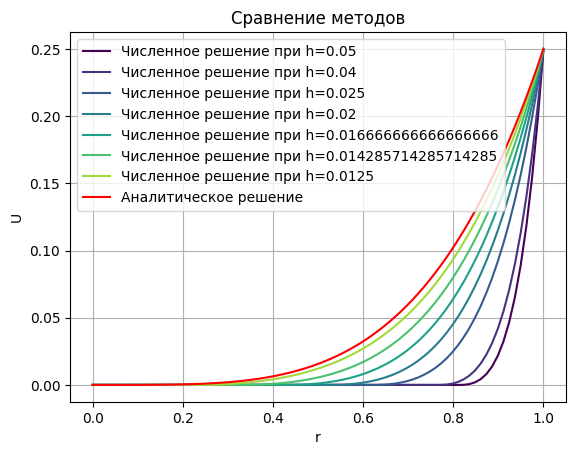

In [5]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-6

def u_analytic(x, t):
    x_size = x.shape[0]
    t_size = t.shape[0]
    u_anal = np.zeros((x_size, t_size))
    for l in range(x_size):
        for n in range(t_size):
            u_anal[l, n] = ((x[l]) ** 4) * (14 - 12 * t[n]) ** (-2)

    return u_anal

def show_graph(args):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection = '3d')
    for i in args:
        ax.plot_surface(i[0], i[1], i[2])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()
    return

def analytics(x, t):
    X, T = np.meshgrid(x, t)
    U = u_analytic(x, t)
    return X, T, U

def progonka(x, t, h, tau):
    x_size = x.shape[0]
    t_size = t.shape[0]
    u = np.zeros((x_size, t_size))

    for l in range(x_size):
        u[l, 0] = ((x[l] * h) ** 4) * (14 ** (-2))

    willbe_S = 2 * eps
    while willbe_S > eps:

        for n in range(1, t_size):
            alpha = np.zeros(x_size)
            beta = np.zeros(x_size)

            for l in range(1, x_size - 1):
                a = -((l * h + 0.5 * h) * (u[l + 1, n - 1] ** 0.5 + u[l, n - 1] ** 0.5) / (2 * (l * h) * h * h))
                c = -((l * h - 0.5 * h) * (u[l, n - 1] ** 0.5 + u[l - 1, n - 1] ** 0.5) / (2 * (l * h) * h * h))
                b = 1.0 / tau - a - c
                d = u[l, n - 1] / tau
                alpha[l] = -a / (b + c * alpha[l - 1])
                beta[l] = (d - c * beta[l - 1]) / (b + c * alpha[l - 1])

            for l in range(x_size - 2, -1, -1):
                u[l, n] = alpha[l] * u[l + 1, n - 1] + beta[l]

            u[x_size - 1, n] = 1 / (14 - 12 * t[n]) ** 2
            u_curr = u[x_size - 1, n]
            S = np.max(abs((u[x_size - 1, n] - u_curr) / u_curr))

            if willbe_S > S:
                willbe_S = S

    return u

h_kol = [20,25,40,50,60,70,80]
t_kol = 10000

x = np.linspace(0, 1, h_kol[-1])
t = np.linspace(0, 1, t_kol)

# 3D визуализация

# X_a, T_a, U_a = analytics(x, t)
# U_a_3d = U_a.transpose()
# U_p = progonka(x, t, x[1] - x[0], t[1] - t[0])
# U_p_3d = U_p.transpose()
# print('Аналитическое решение')
# show_graph([[x, T_a, U_a_3d]])
# print('Численное решение')
# show_graph([[x, T_a, U_p_3d]])

# Графики для t=1

for i in range(len(h_kol)):
    h = h_kol[i]
    x_plot = np.linspace(0, 1, h_kol[i])
    U_p_plot = progonka(x, t, x_plot[1] - x_plot[0], t[1] - t[0])
    U_p_plot = U_p_plot[:, -1]
    color = plt.get_cmap()(i / len(h_kol))
    plt.plot(x, U_p_plot, color=color, label=f'Численное решение при h={1/h}')

U_plot_a = U_a[:, -1]

plt.plot(x, U_plot_a, color='red', label=f'Аналитическое решение')
plt.xlabel('r')
plt.ylabel('U')
plt.title('Сравнение методов')
plt.legend()
plt.grid(True)
plt.show()

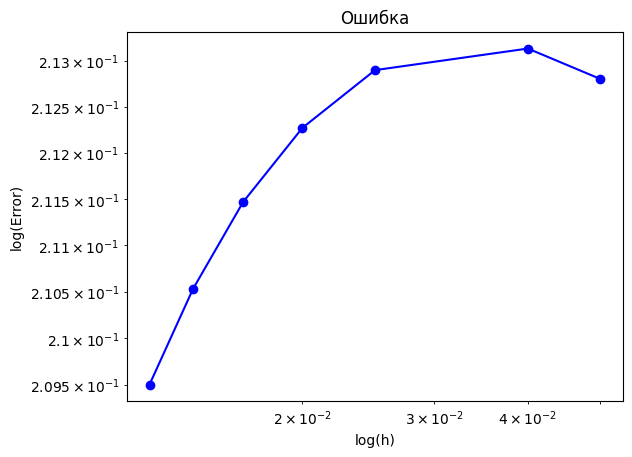

In [8]:
error_list = []

for i in range(len(h_kol)):
    x_plot = np.linspace(0, 1, h_kol[i])
    U_p_plot = progonka(x_plot, t, 1/h_kol[i], t_kol)
    U_p_plot = U_p_plot[:, -1]

    U_plot_a = u_analytic(x_plot, t)[:, -1]

    error = np.max(np.abs(U_plot_a - U_p_plot))
    error_list.append(error)

plt.loglog(1/np.array(h_kol), error_list, marker='o', linestyle='-', color='blue')
plt.xlabel('log(h)')
plt.ylabel('log(Error)')
plt.title('Ошибка')
plt.grid(True)
plt.show()